In [ ]:
# Load the necessary python modules
 
from colabtools import sheets
def read_table_from_trix(trix_uri):
  s_id = sheets.get_spreadsheet_id(trix_uri)
  w_id = sheets.get_worksheet_id(trix_uri)
  df = sheets.get_cells(s_id, w_id, has_col_header=True)
  return df

import numpy as np
import pandas as pd
              
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.rcParams["figure.figsize"] = (10, 5)

# Load the data

Data [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [ ]:
# Option 1: Load directly from your local system

# housing_train_data = pd.read_csv('housing_train_data')
# housing_test_data = pd.read_csv('housing_test_data')

In [ ]:
# Option 2: Load directly fron github account: https://github.com/michevan/WIDS-Google

# url = 'https://raw.githubusercontent.com/michevan/WIDS-Google/main/data/house_price_prediction_data.csv'
# housing_train_data = pd.read_csv(url)

In [ ]:
# Option 3: Load from Google Drive

# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/house_price_prediction_data.csv'
# housing_train_data = pd.read_csv(path)

In [ ]:
housing_train_data = "https://docs.google.com/spreadsheets/d/1Me1pChpe4jidG0-1iLlF4Tq2amKA52hemPC2KdCp5-0/edit#gid=1894926773"
housing_train_data = read_table_from_trix(housing_train_data)
housing_train_data.head(5)

Beginning OAuth2 authorization process ...
Authentication successful.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
3,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
4,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
5,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
6,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [ ]:
housing_test_data = "https://docs.google.com/spreadsheets/d/1FyTw24lZfss8_XH2MvPVxx_XkismNY94rMoujfvyA1g/edit#gid=1895795487"
housing_test_data = read_table_from_trix(housing_test_data)
housing_test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
3,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
4,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
5,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,NA,NA,NA,0,6,2010,WD,Normal
6,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,NA,NA,NA,0,1,2010,WD,Normal


# **Data Exploration**

In [ ]:
print("Number of train samples are", housing_train_data.shape)
print("Number of test samples are", housing_test_data.shape)

Number of train samples are (1460, 81)
Number of test samples are (1459, 80)


In [ ]:
# Looking at the columns in the dataset
housing_train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# looking at the num of rows and columns in the data
housing_train_data.shape

(1460, 81)

In [ ]:
# checking dtypes
housing_train_data.dtypes

Id               object
MSSubClass       object
MSZoning         object
LotFrontage      object
LotArea          object
                  ...  
MoSold           object
YrSold           object
SaleType         object
SaleCondition    object
SalePrice        object
Length: 81, dtype: object

In [ ]:
# describing the data
housing_train_data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,1460,15,5,111,1073,2,3,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,5,328,4,5,6,5,5,5,7,637,7,144,780,721,6,...,2,6,753,417,24,861,4,3,4,3,8,4,4,12,7,4,6,7,98,4,5,441,6,6,3,274,202,120,20,76,8,4,5,5,21,12,5,9,6,663
top,1174,20,RL,NA,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2006,1950,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,0,0,GasA,...,Y,SBrkr,864,0,0,864,0,0,2,0,3,1,TA,6,Typ,0,NA,Attchd,NA,Unf,2,0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2009,WD,Normal,140000
freq,1,536,1151,259,25,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,397,821,67,178,1141,1434,515,504,864,861,906,1282,647,649,1311,953,430,467,1256,1293,118,37,1428,...,1365,1334,25,829,1434,22,856,1378,768,913,804,1392,735,402,1360,690,690,870,81,605,824,81,1311,1326,1340,761,656,1252,1436,1344,1453,1453,1179,1406,1408,253,338,1267,1198,20


In [ ]:
housing_train_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
3,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500


In [ ]:
# descriving a particular column
housing_train_data['SalePrice'].describe()

count       1460
unique       663
top       140000
freq          20
Name: SalePrice, dtype: object

In [ ]:
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
housing_train_data[cols] = housing_train_data[cols].apply(pd.to_numeric, errors='coerce', axis=1)
housing_test_data[cols] = housing_test_data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

target_col = ['SalePrice']
housing_train_data[target_col] = housing_train_data[target_col].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
# converting the columns to integer to plot the data
# housing_train_data['SalePrice'] = housing_train_data['SalePrice'].astype(int)
# housing_train_data['TotalBsmtSF'] = housing_train_data['TotalBsmtSF'].astype(int)
# housing_train_data['GrLivArea'] = housing_train_data['GrLivArea'].astype(int)
# housing_train_data['OverallQual'] = housing_train_data['OverallQual'].astype(int)

In [ ]:
housing_train_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,1,60.0,RL,65.0,8450.0,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,2.0,2008.0,WD,Normal,208500
3,2,20.0,RL,80.0,9600.0,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,5.0,2007.0,WD,Normal,181500


/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_tpu_dd_aroramanisha.kernel.aroramanisha.4741514267156.14b334fb3717c109/mount/server/ml_notebook.runfiles/google3/third_party/py/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


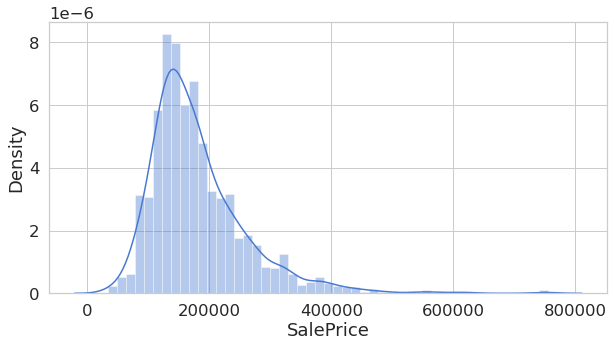

In [ ]:
sns.distplot(housing_train_data['SalePrice']);

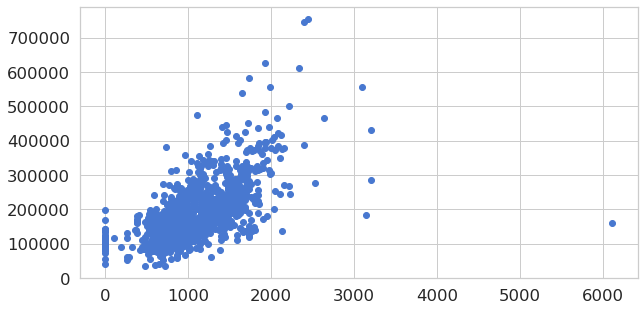

In [ ]:
plt.scatter(x = housing_train_data['TotalBsmtSF'], y = housing_train_data['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

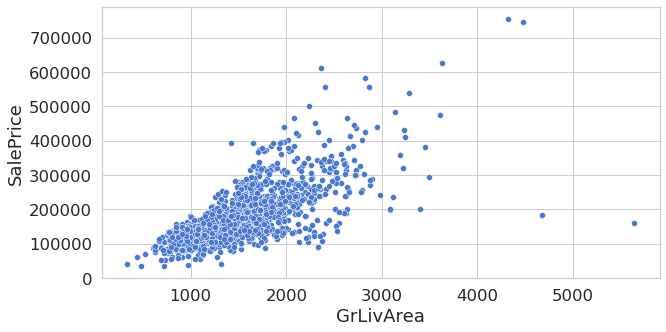

In [ ]:
sns.scatterplot(data=housing_train_data, x='GrLivArea', y='SalePrice')

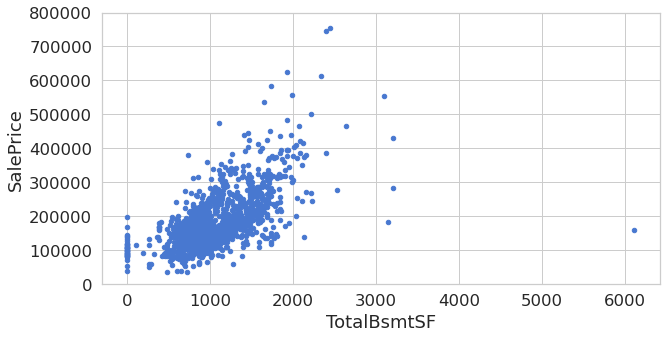

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([housing_train_data['SalePrice'], housing_train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

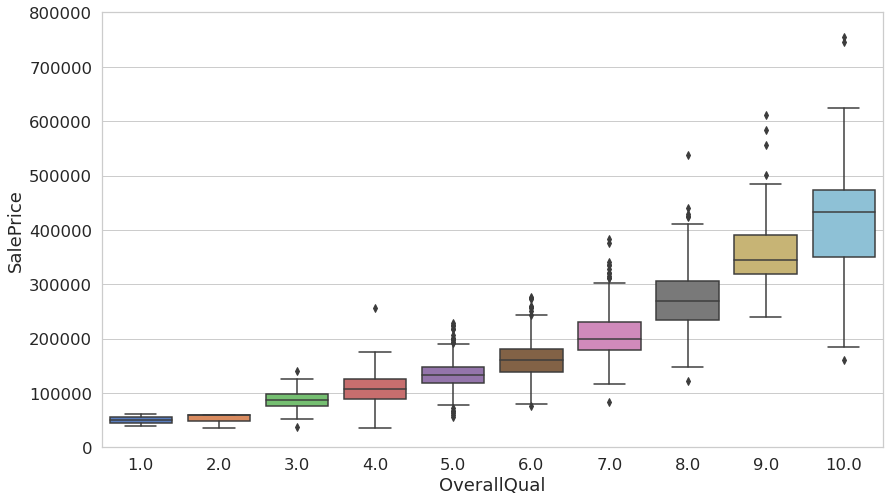

In [ ]:
var = 'OverallQual'
data = pd.concat([housing_train_data['SalePrice'], housing_train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_tpu_dd_aroramanisha.kernel.aroramanisha.4741514267156.14b334fb3717c109/mount/server/ml_notebook.runfiles/google3/third_party/py/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


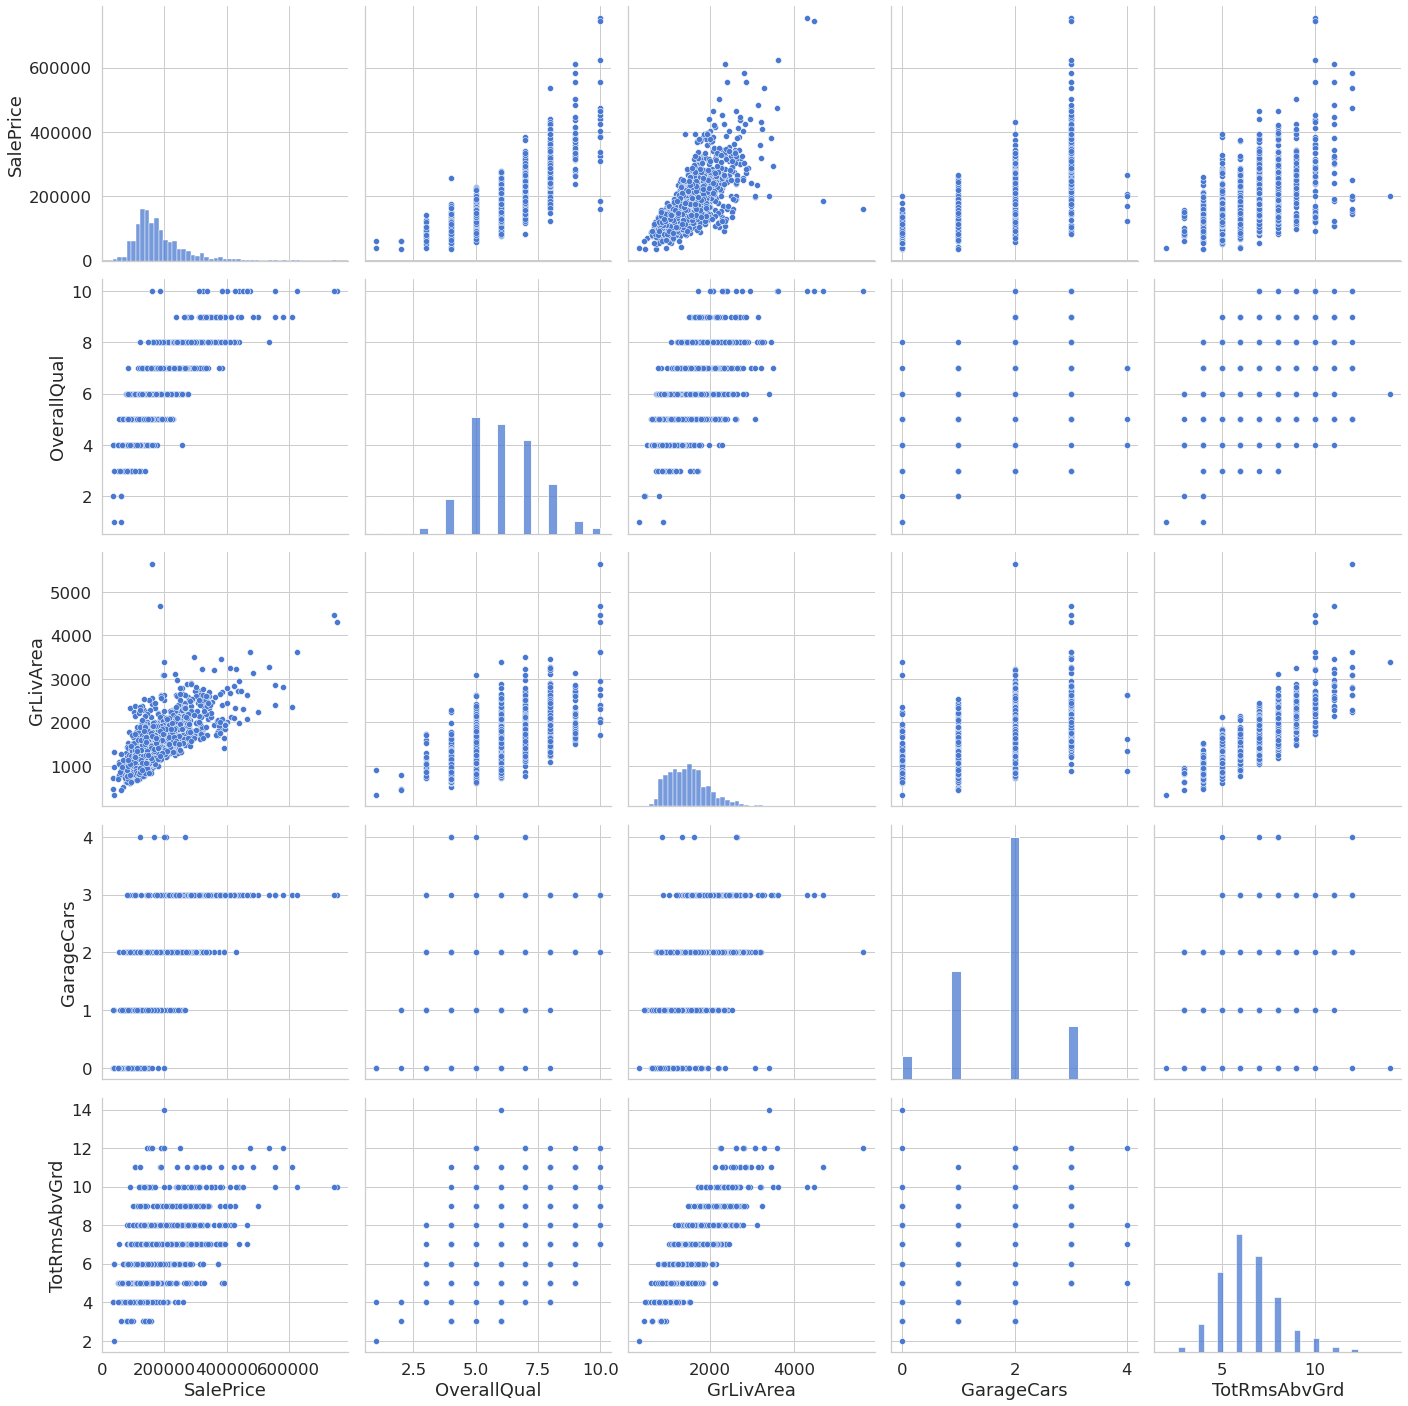

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotRmsAbvGrd']
sns.pairplot(housing_train_data[cols], size = 4);

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_tpu_dd_aroramanisha.kernel.aroramanisha.4741514267156.14b334fb3717c109/mount/server/ml_notebook.runfiles/google3/third_party/py/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


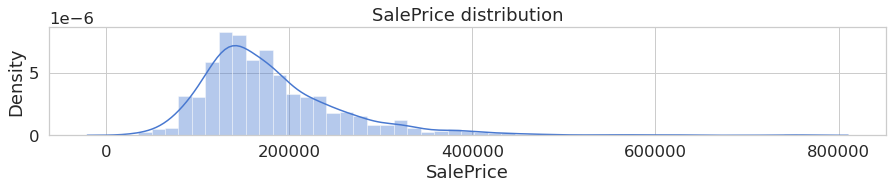

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_tpu_dd_aroramanisha.kernel.aroramanisha.4741514267156.14b334fb3717c109/mount/server/ml_notebook.runfiles/google3/third_party/py/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


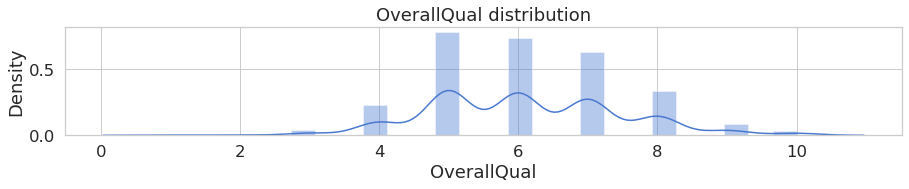

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_tpu_dd_aroramanisha.kernel.aroramanisha.4741514267156.14b334fb3717c109/mount/server/ml_notebook.runfiles/google3/third_party/py/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


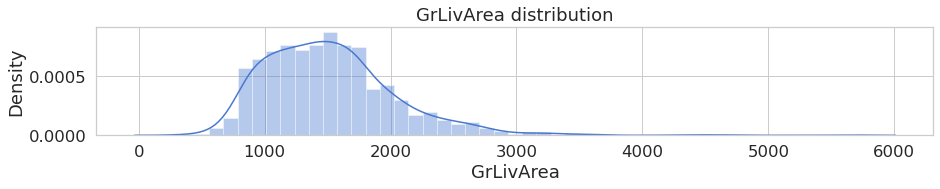

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_tpu_dd_aroramanisha.kernel.aroramanisha.4741514267156.14b334fb3717c109/mount/server/ml_notebook.runfiles/google3/third_party/py/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


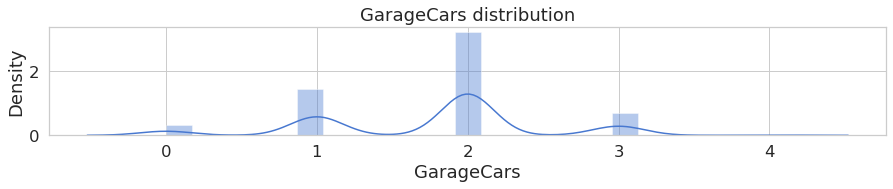

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_tpu_dd_aroramanisha.kernel.aroramanisha.4741514267156.14b334fb3717c109/mount/server/ml_notebook.runfiles/google3/third_party/py/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


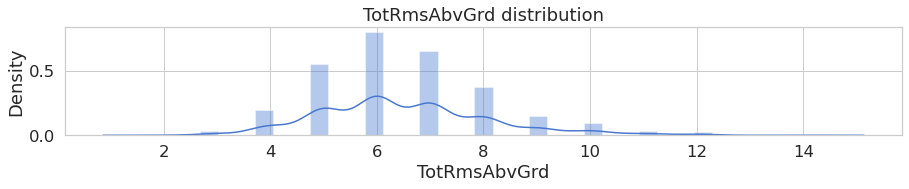

In [ ]:
for col in cols:
    plt.figure(figsize=(15, 2))
    sns.distplot(housing_train_data[col],kde=True)
    plt.title(col+" distribution")
    #i=i+1
    plt.show()

# Exploratory Data Analysis

# Correlation Analysis

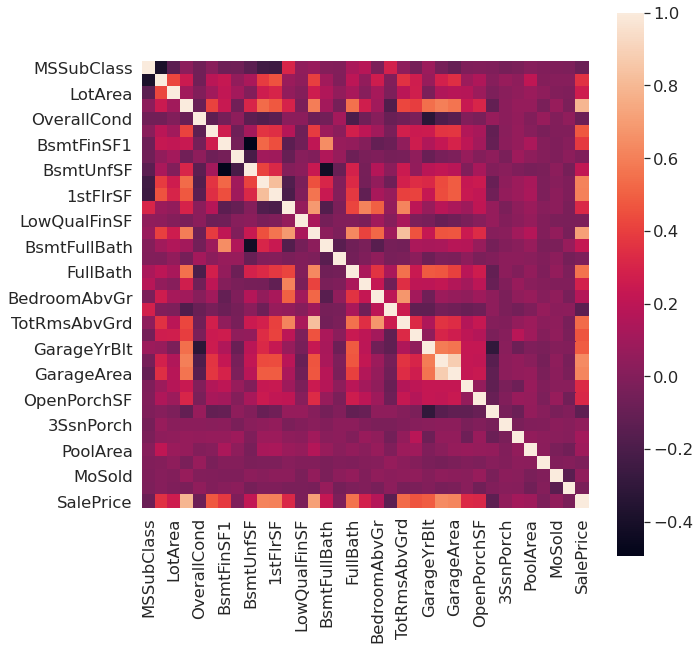

In [ ]:
corrmat = housing_train_data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, square=True);

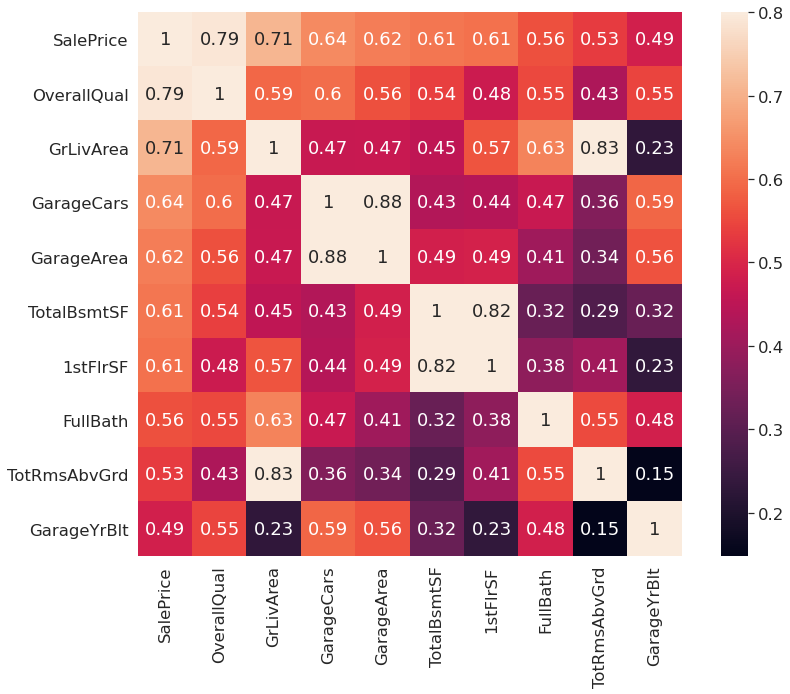

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(housing_train_data[cols].corr(), vmax=.8, square=True, annot = True);

# Feature Engineering

In [ ]:
# columns wit missing values
cols_with_missing = [col for col in housing_train_data.columns 
                                 if housing_train_data[col].isnull().any()]
miss_count = housing_train_data.isna().sum()
miss_df = (pd.concat([miss_count.rename('Missing count'),miss_count.div(len(housing_train_data)).rename('Missing value')],axis = 1).loc[miss_count.ne(0)])
miss_df.style.background_gradient(cmap="coolwarm")

,Missing count,Missing value
LotFrontage,259,0.177397
MasVnrArea,8,0.005479
GarageYrBlt,81,0.055479


In [ ]:
# Substituting missing values for Year Built as 2022
housing_train_data['GarageYrBlt'] = housing_train_data['GarageYrBlt'].replace(np.nan, 2022)
housing_test_data['GarageYrBlt'] = housing_test_data['GarageYrBlt'].replace(np.nan, 2022)

In [ ]:
# Use simple imputer for other columns
from sklearn.impute import SimpleImputer
null_cols=['LotFrontage', 'MasVnrArea']
imp = SimpleImputer(missing_values=np.nan, strategy='median')

housing_train_data[null_cols]  = imp.fit_transform(housing_train_data[null_cols])
housing_test_data[null_cols]  = imp.transform(housing_test_data[null_cols])
housing_test_data = housing_test_data.fillna(0)

In [ ]:
# rechecking columns wit missing values after imputation
cols_with_missing = [col for col in housing_train_data.columns 
                                 if housing_train_data[col].isnull().any()]
miss_count = housing_train_data.isna().sum()
miss_df = (pd.concat([miss_count.rename('Missing count'),miss_count.div(len(housing_train_data)).rename('Missing value')],axis = 1).loc[miss_count.ne(0)])
miss_df.style.background_gradient(cmap="coolwarm")

,Missing count,Missing value


# Feature Engineering

In [ ]:
housing_train_data = housing_train_data.drop(columns = 'Id')
housing_test_data = housing_test_data.drop(columns = 'Id')

categorical_cols=[c for c in housing_train_data.columns if (1<housing_train_data[c].nunique()) & (housing_train_data[c].dtype != np.number)& (housing_train_data[c].dtype != int) & (housing_train_data[c].dtype != 'float64')]

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_tpu_dd_aroramanisha.kernel.aroramanisha.4741514267156.14b334fb3717c109/mount/server/ml_notebook:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    housing_train_data[col] = le.fit_transform(housing_train_data[col])
    housing_test_data[col] = le.fit_transform(housing_test_data[col])

In [ ]:
housing_train_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,60.0,3,65.0,8450.0,1,1,3,3,0,4,0,5,2,2,0,5,7.0,5.0,104,53,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706.0,6,0.0,150.0,856.0,1,0,1,5,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2,8.0,6,0.0,3,1,2003.0,2,2.0,548.0,5,5,2,0.0,61.0,0.0,0.0,0.0,0.0,3,4,1,0.0,2.0,2008.0,8,4,208500
3,20.0,3,80.0,9600.0,1,1,3,3,0,2,0,24,1,2,0,2,6.0,8.0,77,26,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,1,0,1,5,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,6,1.0,5,1,1976.0,2,2.0,460.0,5,5,2,298.0,0.0,0.0,0.0,0.0,0.0,3,4,1,0.0,5.0,2007.0,8,4,181500
4,60.0,3,68.0,11250.0,1,1,0,3,0,4,0,5,2,2,0,5,7.0,5.0,102,52,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486.0,6,0.0,434.0,920.0,1,0,1,5,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,5,1,2001.0,2,2.0,608.0,5,5,2,0.0,42.0,0.0,0.0,0.0,0.0,3,4,1,0.0,9.0,2008.0,8,4,223500
5,70.0,3,60.0,9550.0,1,1,0,3,0,0,0,6,2,2,0,5,7.0,5.0,19,20,1,1,13,15,3,0.0,3,4,0,4,1,4,0,216.0,6,0.0,540.0,756.0,1,2,1,5,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,6,1.0,2,5,1998.0,3,3.0,642.0,5,5,2,0.0,35.0,272.0,0.0,0.0,0.0,3,4,1,0.0,2.0,2006.0,8,0,140000
6,60.0,3,84.0,14260.0,1,1,0,3,0,2,0,15,2,2,0,5,8.0,5.0,101,50,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,1,0,1,5,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,5,1,2000.0,2,3.0,836.0,5,5,2,192.0,84.0,0.0,0.0,0.0,0.0,3,4,1,0.0,12.0,2008.0,8,4,250000


In [ ]:
y = housing_train_data['SalePrice']
X = housing_train_data.drop(columns = 'SalePrice')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_train_features = scaler.fit_transform(X)
housing_test_data = scaler.transform(housing_test_data)

In [ ]:
# output of scalar transformation is numpy array so convert it into dataframe
housing_train_features = pd.DataFrame(housing_train_features, index = X.index, columns=X.columns)
housing_test_data = pd.DataFrame(housing_test_data, columns=X.columns)

# Model Building

In [ ]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_train_features, y, test_size = 0.2, random_state = 50)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1168, 79)
Shape of X_test:  (292, 79)
Shape of y_train:  (1168,)
Shape of y_test (292,)


In [ ]:
# Fitting the regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Understanding regression scores on train and test data
print('Regression score on train data is: ', round(reg.score(X_train, y_train),2))
print('Regression score on test data is: ', round(reg.score(X_test, y_test),2))

Regression score on train data is:  0.85
Regression score on test data is:  0.82


In [ ]:
y_pred_train = round(pd.Series(reg.predict(X_train)))

In [ ]:
y_train.reset_index(drop=True, inplace=True)
out = pd.concat([y_train, y_pred_train], axis=1)
out.columns = ['SalePrice', 'SalePrice_pred']
out.head()

,SalePrice,SalePrice_pred
0,194500,223634.0
1,68500,38755.0
2,138500,143279.0
3,394617,375643.0
4,123000,132685.0


In [ ]:
y_pred_test = round(pd.Series(reg.predict(X_test)))
y_pred_test.head()

0    245159.0
1    195637.0
2    115163.0
3    120039.0
4    290929.0
dtype: float64

In [ ]:
# Feature importance

from matplotlib import pyplot
reg.fit(X, y)
# get importance
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -112.21791
Feature: 1, Score: -970.95692
Feature: 2, Score: -154.24119
Feature: 3, Score: 0.40321
Feature: 4, Score: 28186.70578
Feature: 5, Score: 2631.06731
Feature: 6, Score: -836.94747
Feature: 7, Score: 3024.99532
Feature: 8, Score: -54294.99257
Feature: 9, Score: 36.77443
Feature: 10, Score: 5353.70000
Feature: 11, Score: 393.33128
Feature: 12, Score: -935.71138
Feature: 13, Score: -9091.04101
Feature: 14, Score: -2882.73283
Feature: 15, Score: -1034.80812
Feature: 16, Score: 10940.65375
Feature: 17, Score: 5324.19179
Feature: 18, Score: 201.69251
Feature: 19, Score: -19.34389
Feature: 20, Score: 1996.48014
Feature: 21, Score: 5190.48836
Feature: 22, Score: -1017.87091
Feature: 23, Score: 417.27458
Feature: 24, Score: 3017.92500
Feature: 25, Score: 36.51444
Feature: 26, Score: -10023.84457
Feature: 27, Score: 737.93656
Feature: 28, Score: 727.44686
Feature: 29, Score: -4034.64238
Feature: 30, Score: 1430.10974
Feature: 31, Score: -2844.63358
Feature: 32, Score:

<AxesSubplot:>

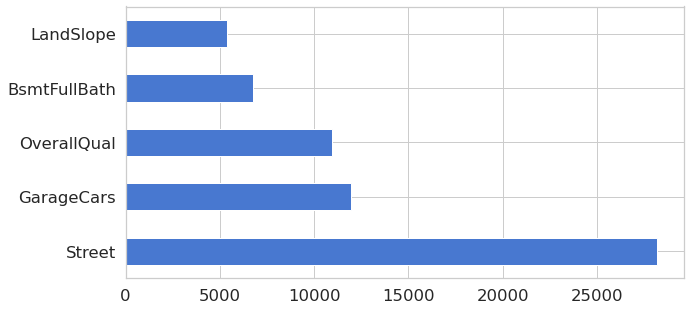

In [ ]:
# PLotting top 5 features
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [ ]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_brain_frameworks_tpu_dd_aroramanisha.kernel.aroramanisha.4741514267156.14b334fb3717c109/mount/server/ml_notebook.runfiles/google3/third_party/py/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.251e+09, tolerance: 7.308e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.1)

In [ ]:
# Understanding regression scores on train and test data
print('Regression score on train data is: ', round(reg_lasso.score(X_train, y_train),2))
print('Regression score on test data is: ', round(reg_lasso.score(X_test, y_test),2))

Regression score on train data is:  0.85
Regression score on test data is:  0.82


In [ ]:
# Predicting on housing test data
reg_lasso.predict(housing_test_data)

array([248462.46100631, 298926.59786648, 314223.95645132, ...,
       286321.32681717, 268015.47387091, 392564.14860398])

In [ ]:
# Additional Reading:
# https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685

In [ ]:
### End of code ###